# Organización, limpieza y definición de los sets de datos

## Carga y forma de datos

In [63]:
import pandas as pd

# Read the data from the file into a dataframe
df = pd.read_csv('data.txt')

### Tamaño de los datos y método "head"

In [64]:
# Display the dataframe
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Se tienen datos con 15 columnas y un total de 1197 sets da datos

In [65]:
column_types = df.dtypes
print(column_types)


date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


Se observa una consistencia en los datos y sus unidades

## Limpieza y descripción de datos

En el siguiente código limpiamos datos de 'department' para definir correctamente los 2 departamentos y eliminamos las fechas, pues no serán de interés en la investigación.

In [71]:
df=df.drop('date',axis=1)
df['department'] = df['department'].str.replace(' ', '')

In [72]:

for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")


data_dict = {}

data_dict['targeted_productivity'] = [df['targeted_productivity'].describe()['min'], df['targeted_productivity'].describe()['mean'], df['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df['smv'].describe()['min'], df['smv'].describe()['mean'], df['smv'].describe()['max']]
data_dict['wip'] = [df['wip'].describe()['min'], df['wip'].describe()['mean'], df['wip'].describe()['max']]
data_dict['over_time'] = [df['over_time'].describe()['min'], df['over_time'].describe()['mean'], df['over_time'].describe()['max']]
data_dict['incentive'] = [df['incentive'].describe()['min'], df['incentive'].describe()['mean'], df['incentive'].describe()['max']]
data_dict['idle_time'] = [df['idle_time'].describe()['min'], df['idle_time'].describe()['mean'], df['idle_time'].describe()['max']]
data_dict['idle_men'] = [df['idle_men'].describe()['min'], df['idle_men'].describe()['mean'], df['idle_men'].describe()['max']]
data_dict['no_of_style_change'] = [df['no_of_style_change'].describe()['min'], df['no_of_style_change'].describe()['mean'], df['no_of_style_change'].describe()['max']]
data_dict['no_of_workers'] = [df['no_of_workers'].describe()['min'], df['no_of_workers'].describe()['mean'], df['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df['actual_productivity'].describe()['min'], df['actual_productivity'].describe()['mean'], df['actual_productivity'].describe()['max']]

targeted_productivity:
   Mínimo: 0.07
   Promedio: 0.7296324143692565
   Máximo: 0.8
smv:
   Mínimo: 2.9
   Promedio: 15.062172096908938
   Máximo: 54.56
wip:
   Mínimo: 7.0
   Promedio: 1190.4659913169319
   Máximo: 23122.0
over_time:
   Mínimo: 0.0
   Promedio: 4567.460317460317
   Máximo: 25920.0
incentive:
   Mínimo: 0.0
   Promedio: 38.21052631578947
   Máximo: 3600.0
idle_time:
   Mínimo: 0.0
   Promedio: 0.7301587301587301
   Máximo: 300.0
idle_men:
   Mínimo: 0.0
   Promedio: 0.3692564745196324
   Máximo: 45.0
no_of_style_change:
   Mínimo: 0.0
   Promedio: 0.15037593984962405
   Máximo: 2.0
no_of_workers:
   Mínimo: 2.0
   Promedio: 34.60985797827903
   Máximo: 89.0
actual_productivity:
   Mínimo: 0.233705476
   Promedio: 0.7350910969791145
   Máximo: 1.1204375


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7296324143692565 | 0.8     |
| smv                 | 2.9    | 15.062172096908938 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 4567.460317460317 | 25920.0 |
| incentive           | 0.0    | 38.21052631578947 | 3600.0  |
| idle_time           | 0.0    | 0.7301587301587301| 300.0   |
| idle_men            | 0.0    | 0.3692564745196324| 45.0    |
| no_of_style_change  | 0.0    | 0.15037593984962405| 2.0     |
| no_of_workers       | 2.0    | 34.60985797827903 | 89.0    |
| actual_productivity | 0.233705476 | 0.7350910969791145 | 1.1204375 |


Datos únicos de las variables tipo Object

In [78]:
unique_data_dict['team'] = sorted(df['team'].unique().tolist())

for column in df.columns:
    if df[column].dtype == 'object':
        unique_data_dict[column] = df[column].unique().tolist()
unique_data_dict


{'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
 'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

### Datos separados por departamento

Eliminamos los datos de las fechas para obtener un nuevo dataframe sin esta columna

Separamos los datos en dos DataFrames diferentes para poder trabajar sobre ellos correctamente. Se separarán de acuerdo a los dos departamentos que hay 'sweing' y 'finishing'. Lo anterior, para objetivos del estudio. También, se eliminarán 

In [74]:
df_sweing = df[df['department'] == 'sweing']
df_finishing = df[df['department'] == 'finishing']
df_finishing = df_finishing.drop(['wip','idle_men','idle_time','no_of_style_change'], axis=1)
print(df_sweing.shape)
print(df_finishing.shape)
df_finishing

(691, 14)
(506, 10)


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
6,Quarter1,finishing,Thursday,2,0.75,3.94,960,0,8.0,0.755167
13,Quarter1,finishing,Thursday,10,0.65,3.94,960,0,8.0,0.705917
14,Quarter1,finishing,Thursday,8,0.75,2.90,960,0,8.0,0.676667
15,Quarter1,finishing,Thursday,4,0.75,3.94,2160,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,15.0,0.505889


Se analizaran cada uno de estos Dataframes separados.

#### DataFrame Sweing

In [80]:
data_dict = {}

data_dict['targeted_productivity'] = [df_sweing['targeted_productivity'].describe()['min'], df_sweing['targeted_productivity'].describe()['mean'], df_sweing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_sweing['smv'].describe()['min'], df_sweing['smv'].describe()['mean'], df_sweing['smv'].describe()['max']]
data_dict['wip'] = [df_sweing['wip'].describe()['min'], df_sweing['wip'].describe()['mean'], df_sweing['wip'].describe()['max']]
data_dict['over_time'] = [df_sweing['over_time'].describe()['min'], df_sweing['over_time'].describe()['mean'], df_sweing['over_time'].describe()['max']]
data_dict['incentive'] = [df_sweing['incentive'].describe()['min'], df_sweing['incentive'].describe()['mean'], df_sweing['incentive'].describe()['max']]
data_dict['idle_time'] = [df_sweing['idle_time'].describe()['min'], df_sweing['idle_time'].describe()['mean'], df_sweing['idle_time'].describe()['max']]
data_dict['idle_men'] = [df_sweing['idle_men'].describe()['min'], df_sweing['idle_men'].describe()['mean'], df_sweing['idle_men'].describe()['max']]
data_dict['no_of_style_change'] = [df_sweing['no_of_style_change'].describe()['min'], df_sweing['no_of_style_change'].describe()['mean'], df_sweing['no_of_style_change'].describe()['max']]
data_dict['no_of_workers'] = [df_sweing['no_of_workers'].describe()['min'], df_sweing['no_of_workers'].describe()['mean'], df_sweing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_sweing['actual_productivity'].describe()['min'], df_sweing['actual_productivity'].describe()['mean'], df_sweing['actual_productivity'].describe()['max']]


for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.07
   Promedio: 0.7239797395079595
   Máximo: 0.8
smv:
   Mínimo: 10.05
   Promedio: 23.245412445730825
   Máximo: 54.56
wip:
   Mínimo: 7.0
   Promedio: 1190.4659913169319
   Máximo: 23122.0
over_time:
   Mínimo: 0.0
   Promedio: 6508.205499276411
   Máximo: 25920.0
incentive:
   Mínimo: 0.0
   Promedio: 44.483357452966715
   Máximo: 138.0
idle_time:
   Mínimo: 0.0
   Promedio: 1.264833574529667
   Máximo: 300.0
idle_men:
   Mínimo: 0.0
   Promedio: 0.6396526772793053
   Máximo: 45.0
no_of_style_change:
   Mínimo: 0.0
   Promedio: 0.26049204052098407
   Máximo: 2.0
no_of_workers:
   Mínimo: 26.0
   Promedio: 52.44573082489146
   Máximo: 89.0
actual_productivity:
   Mínimo: 0.233705476
   Promedio: 0.7220130317105644
   Máximo: 1.100483918


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7239797395079595 | 0.8     |
| smv                 | 10.05  | 23.245412445730825 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 6508.205499276411 | 25920.0 |
| incentive           | 0.0    | 44.483357452966715 | 138.0   |
| idle_time           | 0.0    | 1.264833574529667 | 300.0   |
| idle_men            | 0.0    | 0.6396526772793053| 45.0    |
| no_of_style_change  | 0.0    | 0.26049204052098407| 2.0     |
| no_of_workers       | 26.0   | 52.44573082489146 | 89.0    |
| actual_productivity | 0.233705476 | 0.7220130317105644 | 1.100483918 |


In [87]:
unique_data_dict['team'] = sorted(df_sweing['team'].unique().tolist())

for column in df_sweing.columns:
    if df_sweing[column].dtype == 'object':
        unique_data_dict[column] = df_sweing[column].unique().tolist()
unique_data_dict
#final

{'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
 'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

#### Data Finishing

In [85]:

data_dict = {}
data_dict['targeted_productivity'] = [df_finishing['targeted_productivity'].describe()['min'], df_finishing['targeted_productivity'].describe()['mean'], df_finishing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_finishing['smv'].describe()['min'], df_finishing['smv'].describe()['mean'], df_finishing['smv'].describe()['max']]
data_dict['over_time'] = [df_finishing['over_time'].describe()['min'], df_finishing['over_time'].describe()['mean'], df_finishing['over_time'].describe()['max']]
data_dict['incentive'] = [df_finishing['incentive'].describe()['min'], df_finishing['incentive'].describe()['mean'], df_finishing['incentive'].describe()['max']]
data_dict['no_of_workers'] = [df_finishing['no_of_workers'].describe()['min'], df_finishing['no_of_workers'].describe()['mean'], df_finishing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_finishing['actual_productivity'].describe()['min'], df_finishing['actual_productivity'].describe()['mean'], df_finishing['actual_productivity'].describe()['max']]

for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.35
   Promedio: 0.7373517786561267
   Máximo: 0.8
smv:
   Mínimo: 2.9
   Promedio: 3.887035573122529
   Máximo: 5.13
over_time:
   Mínimo: 0.0
   Promedio: 1917.1541501976285
   Máximo: 15000.0
incentive:
   Mínimo: 0.0
   Promedio: 29.64426877470356
   Máximo: 3600.0
no_of_workers:
   Mínimo: 2.0
   Promedio: 10.25296442687747
   Máximo: 28.0
actual_productivity:
   Mínimo: 0.235795455
   Promedio: 0.7529506683241106
   Máximo: 1.1204375


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.35   | 0.7373517786561267 | 0.8     |
| smv                 | 2.9    | 3.887035573122529  | 5.13    |
| over_time           | 0.0    | 1917.1541501976285 | 15000.0 |
| incentive           | 0.0    | 29.64426877470356  | 3600.0  |
| no_of_workers       | 2.0    | 10.25296442687747  | 28.0    |
| actual_productivity | 0.235795455 | 0.7529506683241106 | 1.1204375 |


In [86]:
unique_data_dict['team'] = sorted(df_finishing['team'].unique().tolist())

for column in df_finishing.columns:
    if df_finishing[column].dtype == 'object':
        unique_data_dict[column] = df_finishing[column].unique().tolist()
unique_data_dict

{'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
 'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

## Datos Graficados

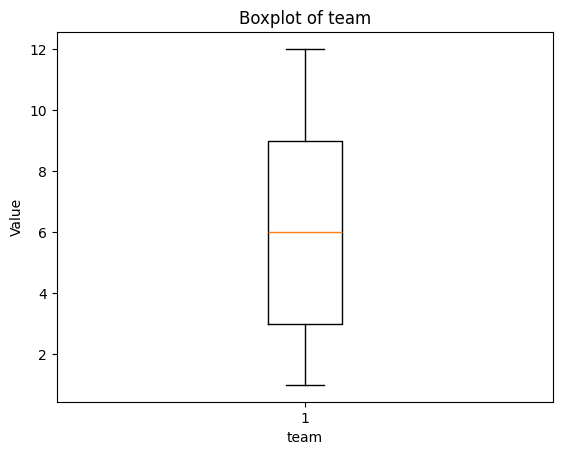

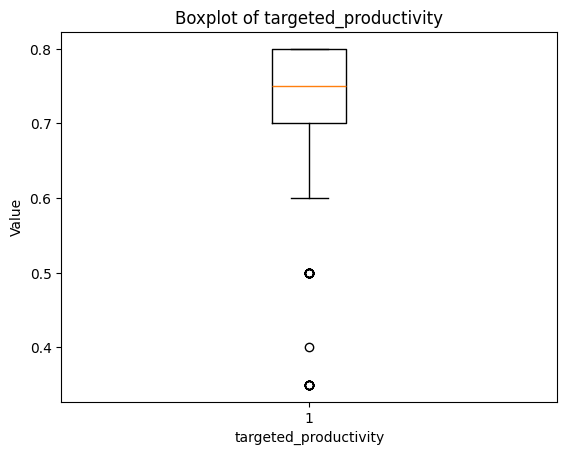

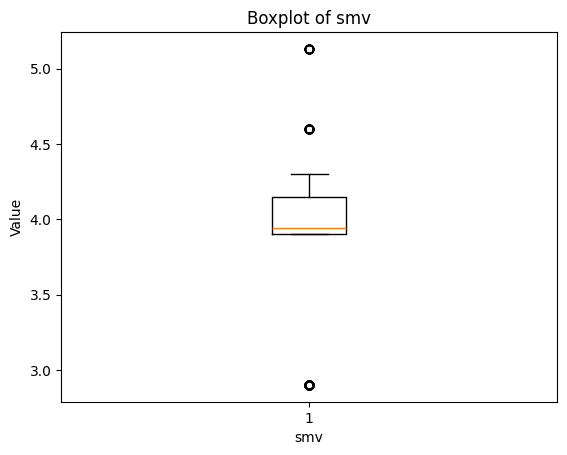

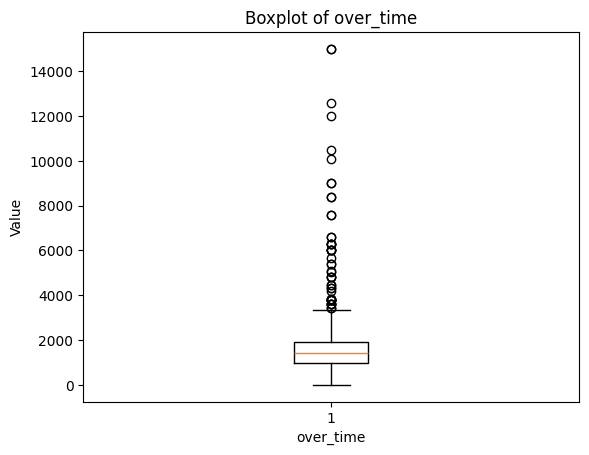

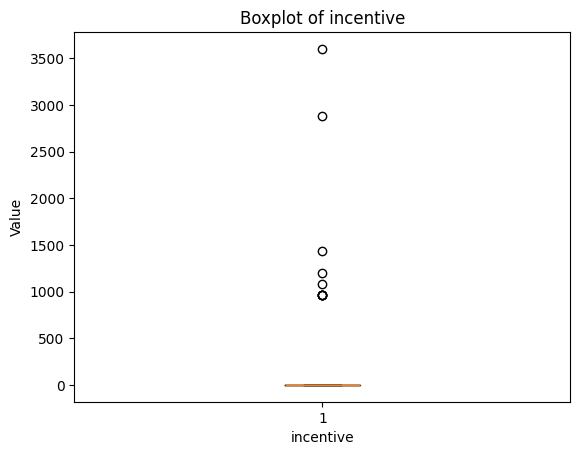

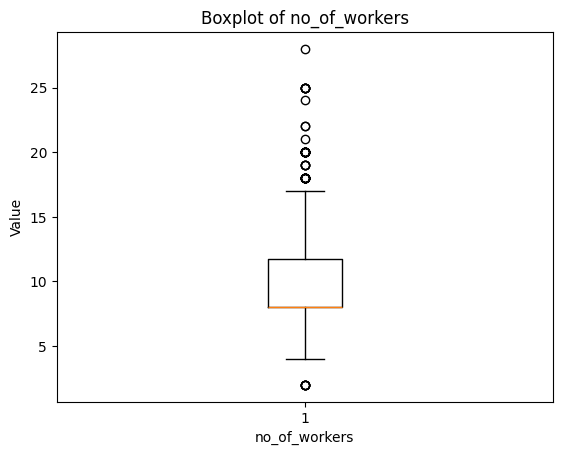

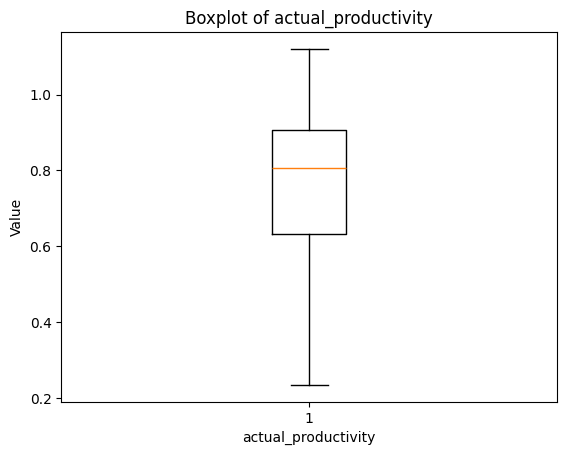

In [107]:
import matplotlib.pyplot as plt

# Select the numerical columns from df_finishing
numeric_columns = ['team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity']
numeric_df = df_finishing[numeric_columns]

# Create a boxplot for each numerical column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(numeric_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    #plt.savefig(f'boxplot_{column}.png')
    plt.show()


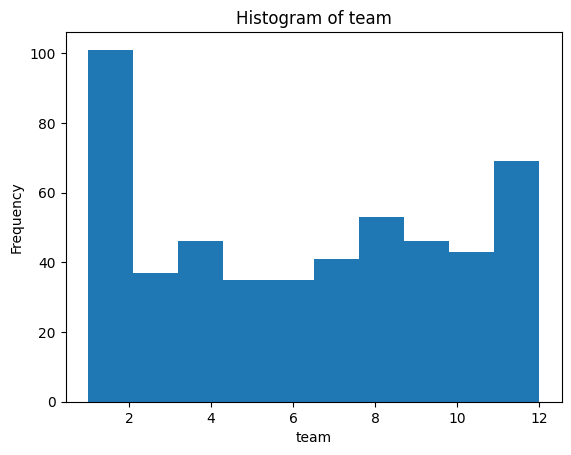

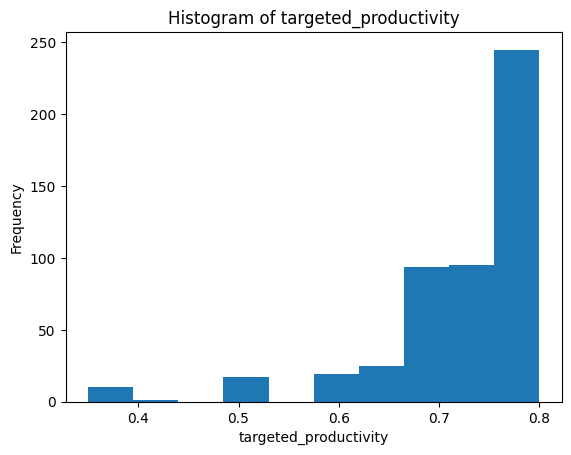

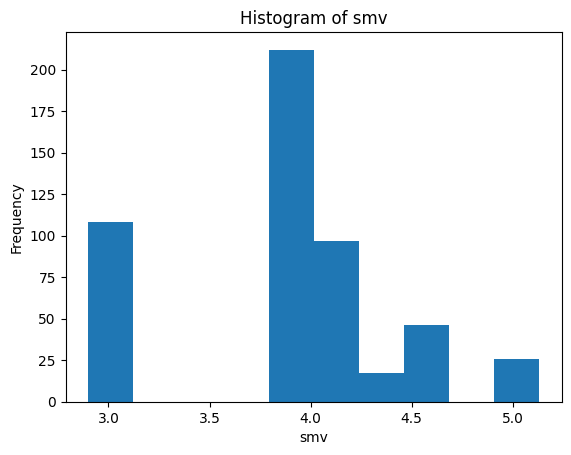

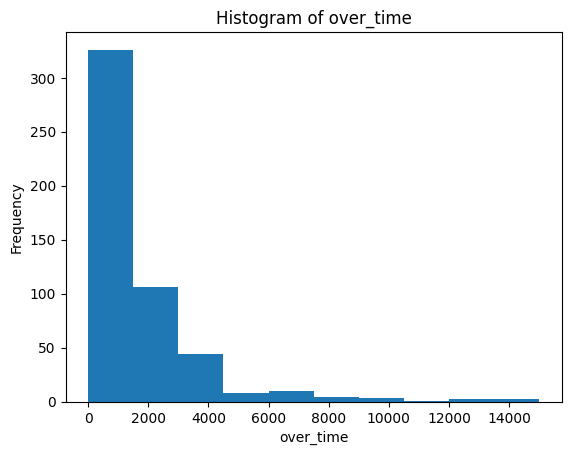

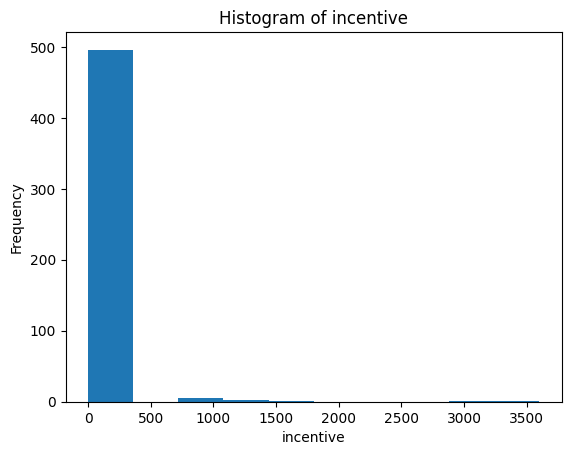

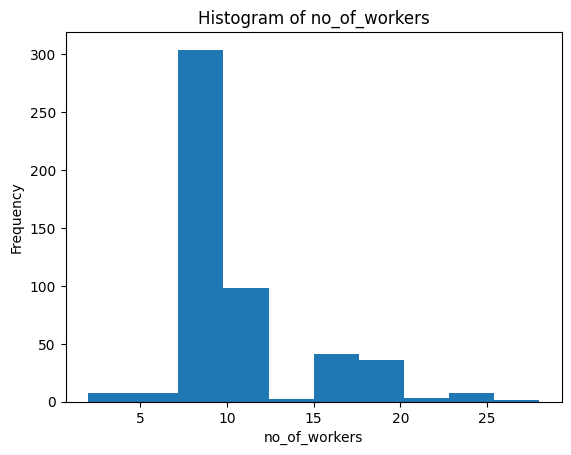

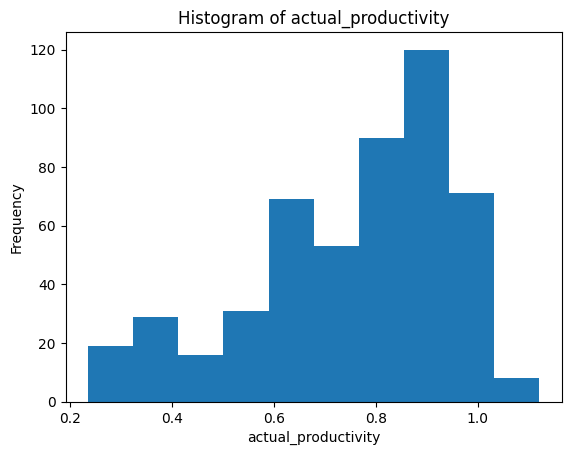

In [109]:
import matplotlib.pyplot as plt
numeric_columns = ['team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity']
for column in numeric_columns:
    plt.figure()
    df_finishing[column].plot.hist()
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
